In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from models_test import LogisticGrowth, SurfaceLimitedGrowth, VonBertalanffyGrowth, GompertzGrowth, ExponentialGrowth, LinearGrowth, MendelsohnGrowth, MontrollGrowth, ExponentialDecayGrowth, AlleeEffectGrowth, LinearLimitedGrowth
import numpy as np
from scipy.integrate import solve_ivp
from math import exp

In [15]:
ts = [
     3.46,  4.58,  5.67,  6.64,  7.63,  8.41,  9.32, 10.27, 11.19,
    12.39, 13.42, 15.19, 16.24, 17.23, 18.18, 19.29, 21.23, 21.99,
    24.33, 25.58, 26.43, 27.44, 28.43, 30.49, 31.34, 32.34, 33.00,
    35.20, 36.34, 37.29, 38.50, 39.67, 41.37, 42.58, 45.39, 46.38,
    48.29, 49.24, 50.19, 51.14, 52.10, 54.00, 56.33, 57.33, 59.38,
]
Vs = [
    0.0158, 0.0264, 0.0326, 0.0445, 0.0646, 0.0933, 0.1454, 0.2183, 0.2842,
    0.4977, 0.6033, 0.8441, 1.2163, 1.4470, 2.3298, 2.5342, 3.0064, 3.4044,
    3.2046, 4.5241, 4.3459, 5.1374, 5.5376, 4.8946, 5.0660, 6.1494, 6.8548,
    5.9668, 6.6945, 6.6395, 6.8971, 7.2966, 7.2268, 6.8815, 8.0993, 7.2112,
    7.0694, 7.4971, 6.9974, 6.7219, 7.0523, 7.1095, 7.0694, 8.0562, 7.2268, 
]

pd.DataFrame({'$t$': ts, '$V$': Vs}).T

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
$t$,3.4600,4.5800,5.6700,6.6400,7.6300,8.4100,9.3200,10.2700,11.1900,12.3900,...,46.3800,48.2900,49.2400,50.1900,51.1400,52.1000,54.0000,56.3300,57.3300,59.3800
$V$,0.0158,0.0264,0.0326,0.0445,0.0646,0.0933,0.1454,0.2183,0.2842,0.4977,...,7.2112,7.0694,7.4971,6.9974,6.7219,7.0523,7.1095,7.0694,8.0562,7.2268


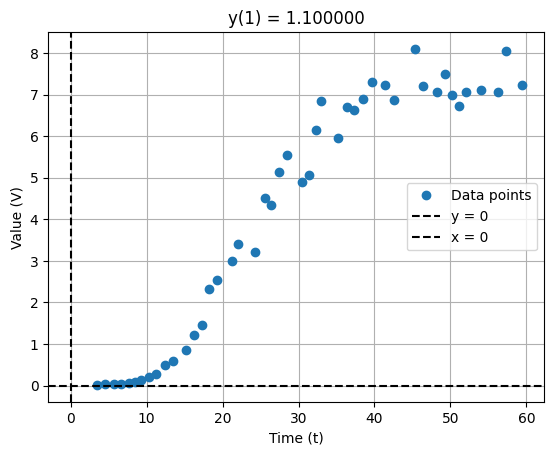

In [3]:
# Plotting
plt.plot(ts, Vs, 'o', label='Data points')
plt.axhline(0.0, color='k', linestyle='--', label='y = 0')  # Horizontal axis
plt.axvline(0.0, color='k', linestyle='--', label='x = 0')  # Vertical axis
plt.grid(True)
plt.title(f'y(1) = {LinearGrowth().euler_method_plot(t=1.0, params={"c":0.1, "V0":1.0}):8.6f}')
plt.legend()
plt.xlabel("Time (t)")
plt.ylabel("Value (V)")
plt.show()

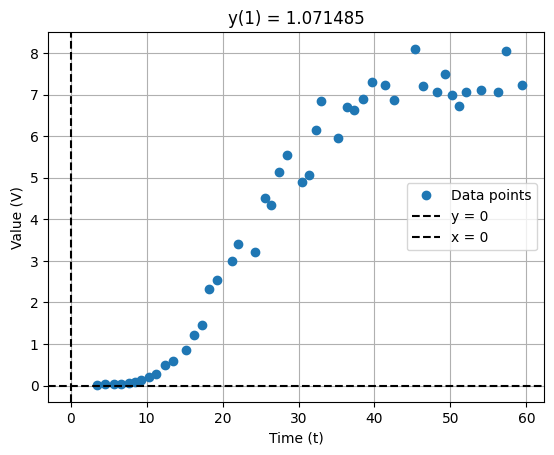

In [4]:
# Plotting
plt.plot(ts, Vs, 'o', label='Data points')
plt.axhline(0.0, color='k', linestyle='--', label='y = 0')  # Horizontal axis
plt.axvline(0.0, color='k', linestyle='--', label='x = 0')  # Vertical axis
plt.grid(True)
plt.title(f'y(1) = {SurfaceLimitedGrowth().euler_method_plot(t=1.0, params={"c":0.1, "V0":1.0, "d":2.0}):8.6f}')
plt.legend()
plt.xlabel("Time (t)")
plt.ylabel("Value (V)")
plt.show()

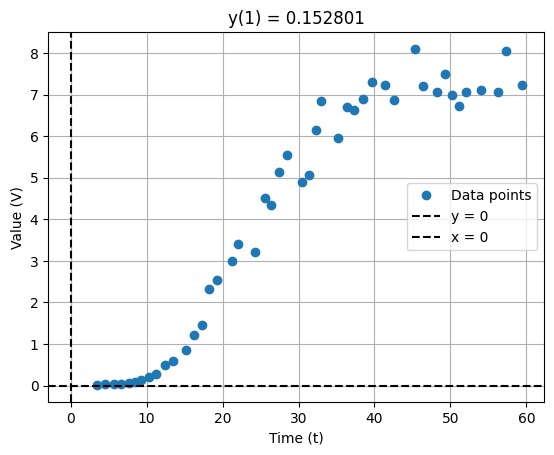

In [5]:
# Plotting
plt.plot(ts, Vs, 'o', label='Data points')
plt.axhline(0.0, color='k', linestyle='--', label='y = 0')  # Horizontal axis
plt.axvline(0.0, color='k', linestyle='--', label='x = 0')  # Vertical axis
plt.grid(True)
plt.title(f'y(1) = {VonBertalanffyGrowth().euler_method_plot(t=1.0, params={"c":0.1, "V0":1.0, "d":2.0}):8.6f}')
plt.legend()
plt.xlabel("Time (t)")
plt.ylabel("Value (V)")
plt.show()

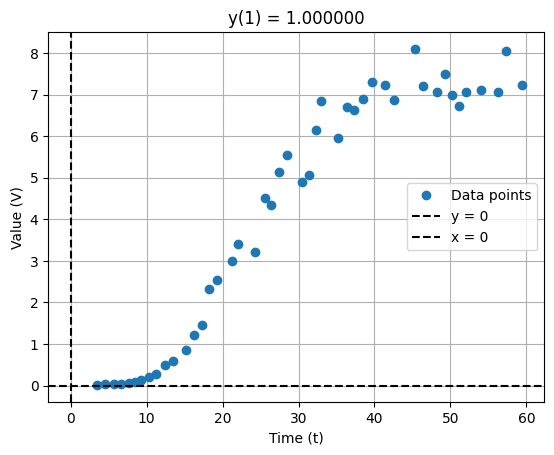

In [6]:
# Plotting
plt.plot(ts, Vs, 'o', label='Data points')
plt.axhline(0.0, color='k', linestyle='--', label='y = 0')  # Horizontal axis
plt.axvline(0.0, color='k', linestyle='--', label='x = 0')  # Vertical axis
plt.grid(True)
plt.title(f'y(1) = {GompertzGrowth().euler_method_plot(t=1.0, params={"c":0.1, "V0":1.0}):8.6f}')
plt.legend()
plt.xlabel("Time (t)")
plt.ylabel("Value (V)")
plt.show()

In [7]:
linear_growth = ExponentialDecayGrowth()
new_params = linear_growth.direct_search(data_ts=ts, data_ys=Vs)
new_params

{'Vmax': 11.447001972133656,
 'c': 0.018767883348582412,
 'V0': 9.536743164062508e-09}

In [8]:
model = LinearGrowth()
optimized_params = model.direct_search(data_ts=ts, data_ys=Vs)
optimized_params

{'c': 0.14958091796875, 'V0': -0.0817254399999997}

In [9]:
linear_growth = ExponentialGrowth()
new_params = linear_growth.direct_search(data_ts=ts, data_ys=Vs)
new_params

{'c': 0.031238093157476627, 'V0': 1.5438419975667272}

In [10]:
linear_growth = MendelsohnGrowth()
new_params = linear_growth.direct_search(data_ts=ts, data_ys=Vs)
new_params

{'c': 0.14583368589405957,
 'd': 0.03646128972980064,
 'V0': 1.2010513887184543e-07}

In [11]:
linear_growth = SurfaceLimitedGrowth()
new_params = linear_growth.direct_search(data_ts=ts, data_ys=Vs)
new_params

{'c': 0.05106542397823427, 'd': -0.8359177328217244, 'V0': 0.8585700305375378}

In [12]:
linear_growth = VonBertalanffyGrowth()
new_params = linear_growth.direct_search(data_ts=ts, data_ys=Vs)
new_params

{'c': 1.4888558786338812, 'd': 0.8668559390689847, 'V0': 9.536743164062508e-09}

In [3]:
linear_growth = GompertzGrowth()
new_params = linear_growth.direct_search(data_ts=ts, data_ys=Vs)
new_params

TypeError: GrowthModel.direct_search() got an unexpected keyword argument 'data_ts'

In [28]:
# Define models of interest

# Normalize data

tmin, tmax = min(ts), max(ts)
tdata = [2.0 * (t - tmin) / (tmax - tmin) - 1.0 for t in ts]

Vmax = max(Vs)
Vdata = [V / Vmax for V in Vs]
tumormodels = (
    AlleeEffectGrowth,
    LinearGrowth,
    ExponentialGrowth,
    MendelsohnGrowth,
    ExponentialDecayGrowth,
    LogisticGrowth,
    VonBertalanffyGrowth,
    GompertzGrowth,
)
ts = [i / 20 - 1.0 for i in range(41)]
"""
    LinearLimitedGrowth,
    SurfaceLimitedGrowth,

        MontrollGrowth,

"""

'\n    LinearLimitedGrowth,\n    SurfaceLimitedGrowth,\n\n        MontrollGrowth,\n\n'

<class 'models_test.AlleeEffectGrowth'>
{'V0': 0.7499327404160002, 'c': 1.5851371822489597, 'Vmin': -0.7362517056000001, 'Vmax': 1.0408832503040002, 'd': 0.9999999850988388}
{'V0': 0.7499327404160002, 'c': 1.5851371822489597, 'Vmin': -0.7362517056000001, 'Vmax': 1.0408832503040002, 'd': 1.0}
<class 'models_test.LinearGrowth'>
{'V0': 0.6121712923049927, 'c': 0.6321842670440674}
{'V0': 0.6121712923049927, 'c': 0.6321841478347778}
<class 'models_test.ExponentialGrowth'>
{'V0': 0.5483003805943375, 'c': 0.8740033945196048}
{'V0': 0.5483003805943375, 'c': 0.8740033945196048}
<class 'models_test.MendelsohnGrowth'>
{'V0': 0.6323233612182618, 'c': 0.5724605067884376, 'd': -0.19141576779937497}
{'V0': 0.6323233612182618, 'c': 0.5724605067884376, 'd': -0.19141583422949998}
<class 'models_test.ExponentialDecayGrowth'>
{'Vmax': 1.0867482559309332, 'c': 1.8089003533206882, 'V0': 0.7499425309895816}
{'Vmax': 1.0867482559309332, 'c': 1.8089003533206882, 'V0': 0.7499425451760632}
<class 'models_test.Lo

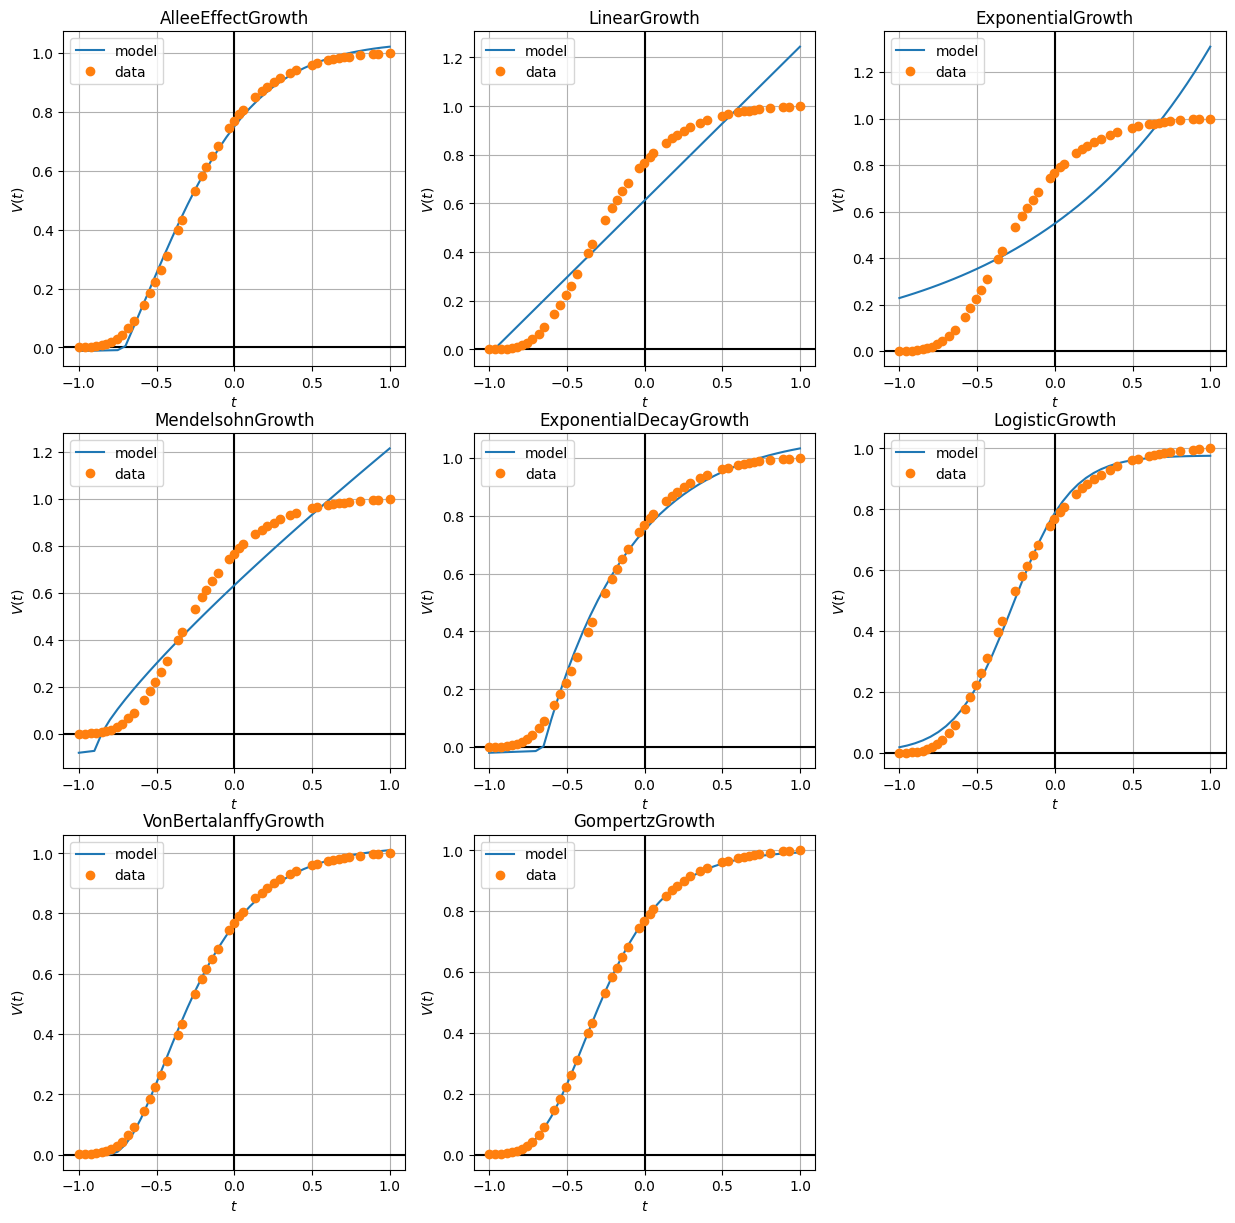

In [29]:
results = {'model': [], 'formula': [], 'BIC': [], 'AIC': [], 'AICc': []}

plt.figure(figsize=(15, 20))

for fig, tumormodel in enumerate(tumormodels, start=1):
    print(tumormodel)
    model = tumormodel(solver='rungekutta', optimizer='direct', evaluation='BIC')
    model.fit_data(tdata, Vdata)
    
    results['model'].append(repr(model))
    results['formula'].append(str(model))
    results['BIC'].append(model.eval_bic())
    results['AIC'].append(model.eval_aic())
    results['AICc'].append(model.eval_aicc())
    
    Vs = [model.euler_method(t) for t in ts]
    
    plt.subplot(4, 3, fig)
    plt.axhline(0.0, color='k'); plt.axvline(0.0, color='k')
    plt.plot(ts, Vs, '-', label='model')
    plt.plot(tdata, Vdata, 'o', label='data')
    plt.title(model.__class__.__name__)
    plt.xlabel('$t$'); plt.ylabel('$V(t)$')
    plt.grid(True); plt.legend()
    
plt.show()

In [30]:
pd.DataFrame(results).set_index('model').sort_values('BIC')


,formula,BIC,AIC,AICc
model,,,,
<models_test.GompertzGrowth object at 0x000002217F6357C0>,<models_test.GompertzGrowth object at 0x000002...,-500.376076,-503.989401,-503.822734
<models_test.VonBertalanffyGrowth object at 0x0000022183426900>,<models_test.VonBertalanffyGrowth object at 0x...,-412.316844,-417.736831,-417.492929
<models_test.AlleeEffectGrowth object at 0x00000221835343E0>,<models_test.AlleeEffectGrowth object at 0x000...,-341.232608,-350.265920,-349.855664
<models_test.LogisticGrowth object at 0x000002217F60BBF0>,<models_test.LogisticGrowth object at 0x000002...,-332.920595,-338.340583,-338.096680
<models_test.ExponentialDecayGrowth object at 0x0000022183EEEBA0>,<models_test.ExponentialDecayGrowth object at ...,-307.957927,-313.377915,-313.134012
<models_test.MendelsohnGrowth object at 0x0000022183E4B0B0>,<models_test.MendelsohnGrowth object at 0x0000...,-198.559705,-203.979693,-203.735790
<models_test.LinearGrowth object at 0x000002217FEBF560>,<models_test.LinearGrowth object at 0x00000221...,-191.302058,-194.915383,-194.748716
<models_test.ExponentialGrowth object at 0x00000221834152E0>,<models_test.ExponentialGrowth object at 0x000...,-143.000305,-146.613630,-146.446964


In [ ]:
# eigen gemaakt van internet

In [ ]:
# eigen gemaakt van internet

In [ ]:
# eigen gemaakt van internet

In [ ]:
# eigen gemaakt van internet